In [23]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
import zipfile
import os


In [24]:
#Unzipping file
zip_file_path = "/Users/sumabommasani/Downloads/breast+cancer+wisconsin+diagnostic.zip"
extracted_dir = "/Users/sumabommasani/Downloads/"


In [25]:
# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)


In [26]:
# Read the data 
data_file_path = os.path.join(extracted_dir, "wdbc.data")
data = pd.read_csv(data_file_path, header=None)


In [27]:
# Display the first few rows of the DataFrame
print(data.head())


         0  1      2      3       4       5        6        7       8    
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  \
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29   
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654  \
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.

In [43]:
missing_values = data.isnull().sum()

if missing_values.sum() > 0:
    data.dropna(inplace=True)  # Option 1: Remove rows with missing values
    # data.fillna(data.mean(), inplace=True)  # Option 2: Impute missing values using mean
    # data.fillna({"column_name": value}, inplace=True)  # Option 3: Impute missing values using specific values
else:
    print("No missing values detected.")

No missing values detected.


In [28]:
# Load attribute names from wdbc.names
attribute_names = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]

# Set column names in the DataFrame
data.columns = attribute_names


In [29]:
# Statistical Summary
print("\nStatistical Summary:")
print(data.describe())



Statistical Summary:
                 ID   Feature_1   Feature_2   Feature_3    Feature_4   
count  5.690000e+02  569.000000  569.000000  569.000000   569.000000  \
mean   3.037183e+07   14.127292   19.289649   91.969033   654.889104   
std    1.250206e+08    3.524049    4.301036   24.298981   351.914129   
min    8.670000e+03    6.981000    9.710000   43.790000   143.500000   
25%    8.692180e+05   11.700000   16.170000   75.170000   420.300000   
50%    9.060240e+05   13.370000   18.840000   86.240000   551.100000   
75%    8.813129e+06   15.780000   21.800000  104.100000   782.700000   
max    9.113205e+08   28.110000   39.280000  188.500000  2501.000000   

        Feature_5   Feature_6   Feature_7   Feature_8   Feature_9  ...   
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...  \
mean     0.096360    0.104341    0.088799    0.048919    0.181162  ...   
std      0.014064    0.052813    0.079720    0.038803    0.027414  ...   
min      0.052630    0.019380    

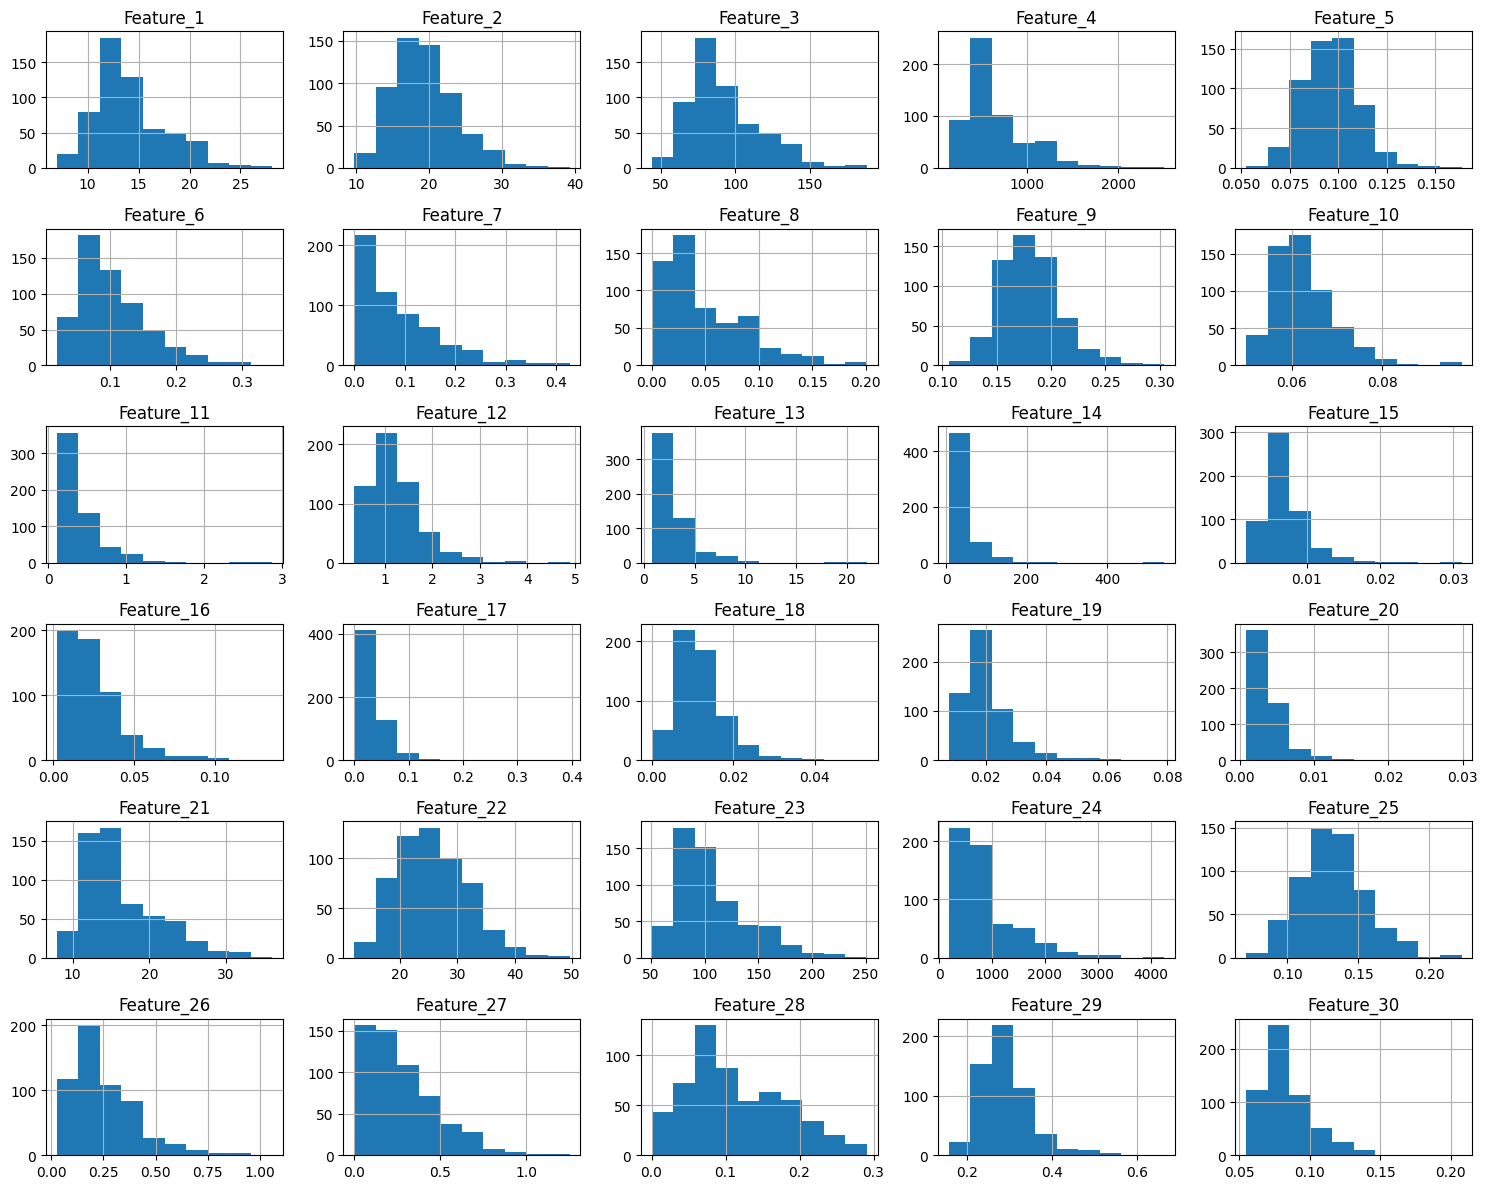

In [30]:
# Data Visualization - Histograms of features
data.drop(columns=['ID', 'Diagnosis']).hist(figsize=(15, 12))
plt.tight_layout()
plt.show()


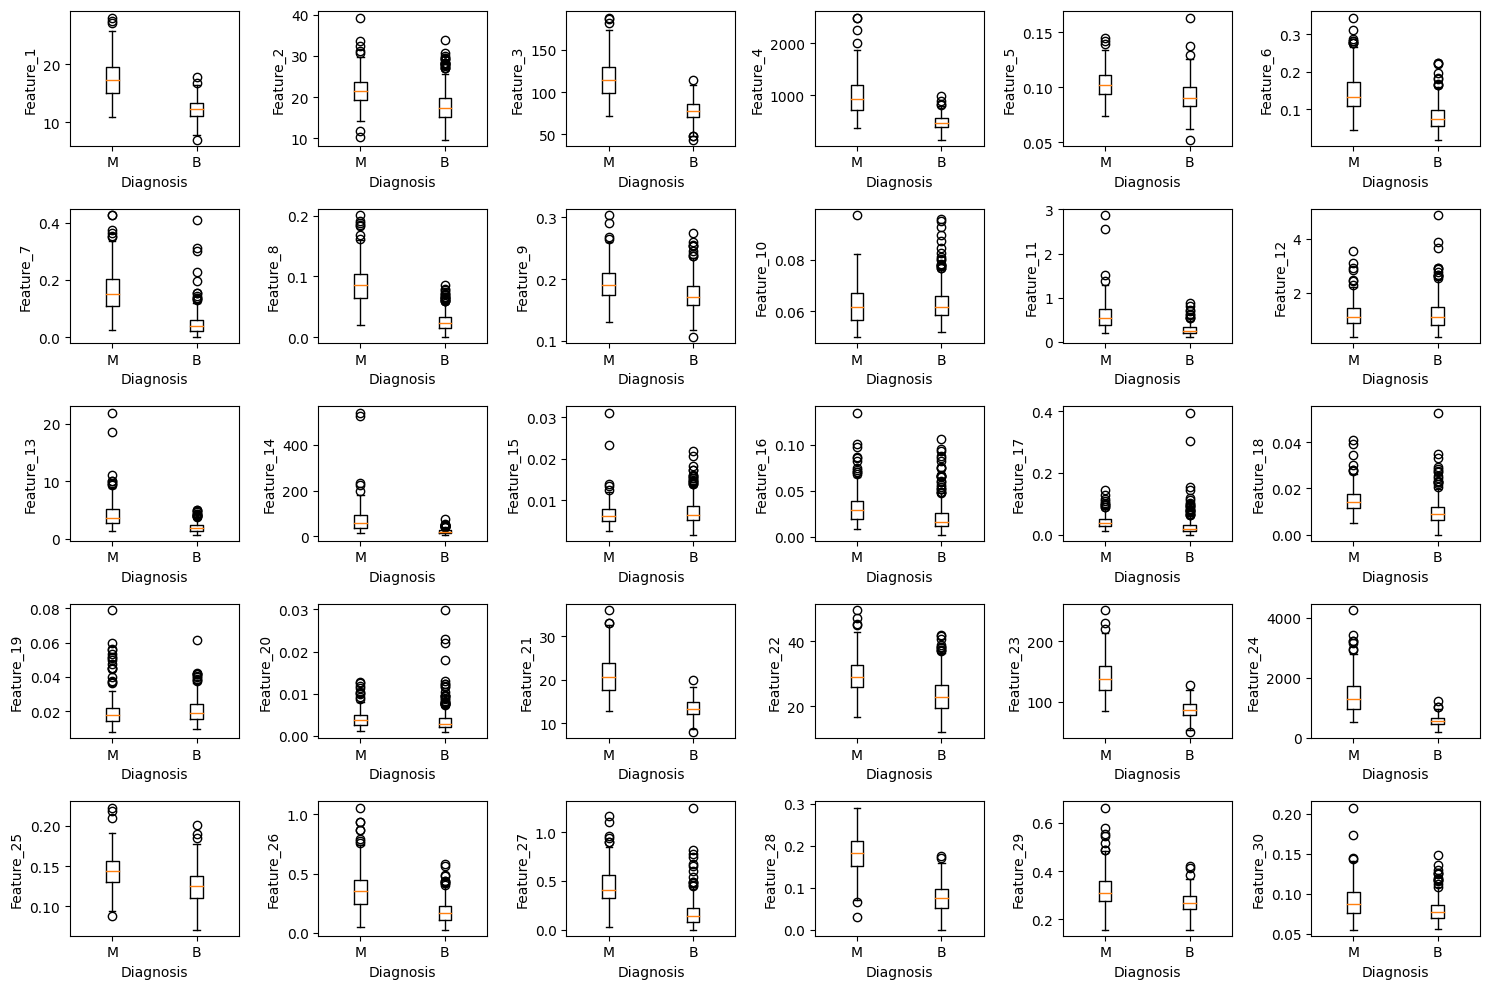

In [31]:
#  Data Visualization - Boxplots of features by Diagnosis
plt.figure(figsize=(15, 10))
for i, feature in enumerate(data.columns[2:]):
    plt.subplot(5, 6, i + 1)
    plt.boxplot([data[data['Diagnosis'] == 'M'][feature], data[data['Diagnosis'] == 'B'][feature]])
    plt.xticks([1, 2], ['M', 'B'])
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


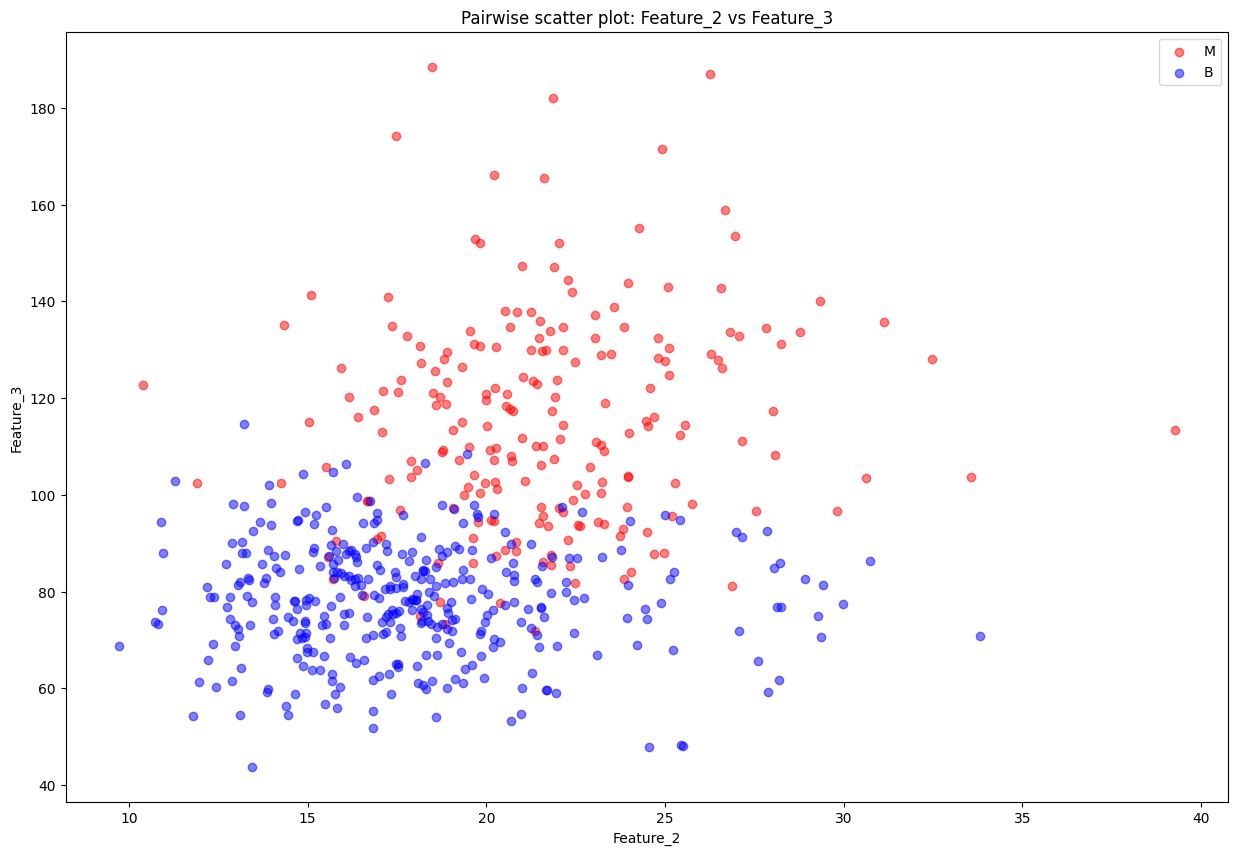

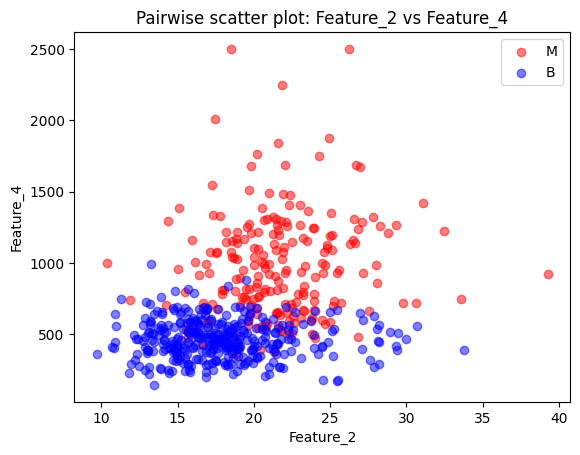

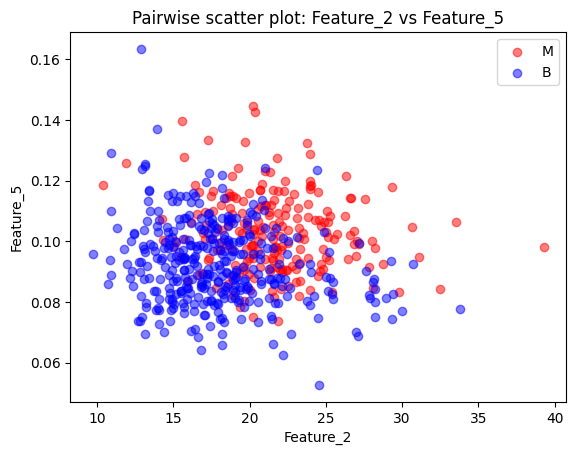

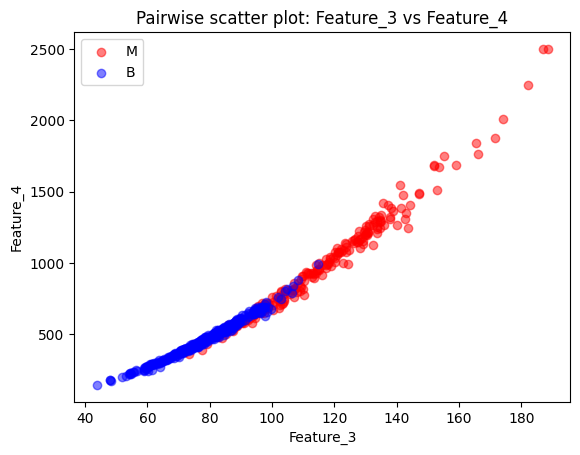

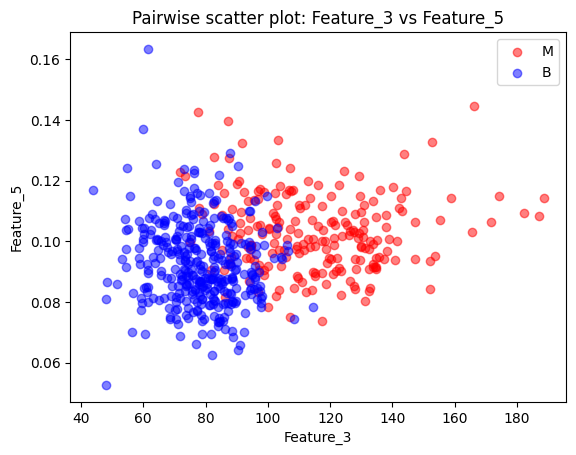

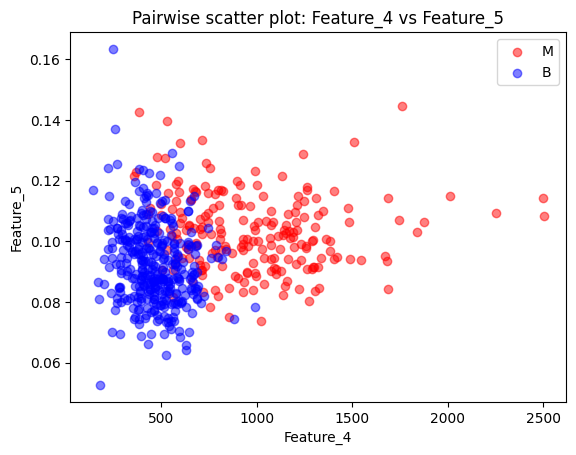

In [32]:
# Pairwise scatter plots
colors = {'M': 'red', 'B': 'blue'}
plt.figure(figsize=(15, 10))
for i in range(2, 6):
    for j in range(i + 1, 6):
        plt.scatter(data[data['Diagnosis'] == 'M'][f'Feature_{i}'], data[data['Diagnosis'] == 'M'][f'Feature_{j}'],
                    color=colors['M'], label='M', alpha=0.5)
        plt.scatter(data[data['Diagnosis'] == 'B'][f'Feature_{i}'], data[data['Diagnosis'] == 'B'][f'Feature_{j}'],
                    color=colors['B'], label='B', alpha=0.5)
        plt.xlabel(f'Feature_{i}')
        plt.ylabel(f'Feature_{j}')
        plt.legend(['M', 'B'])
        plt.title(f'Pairwise scatter plot: Feature_{i} vs Feature_{j}')
        plt.show()


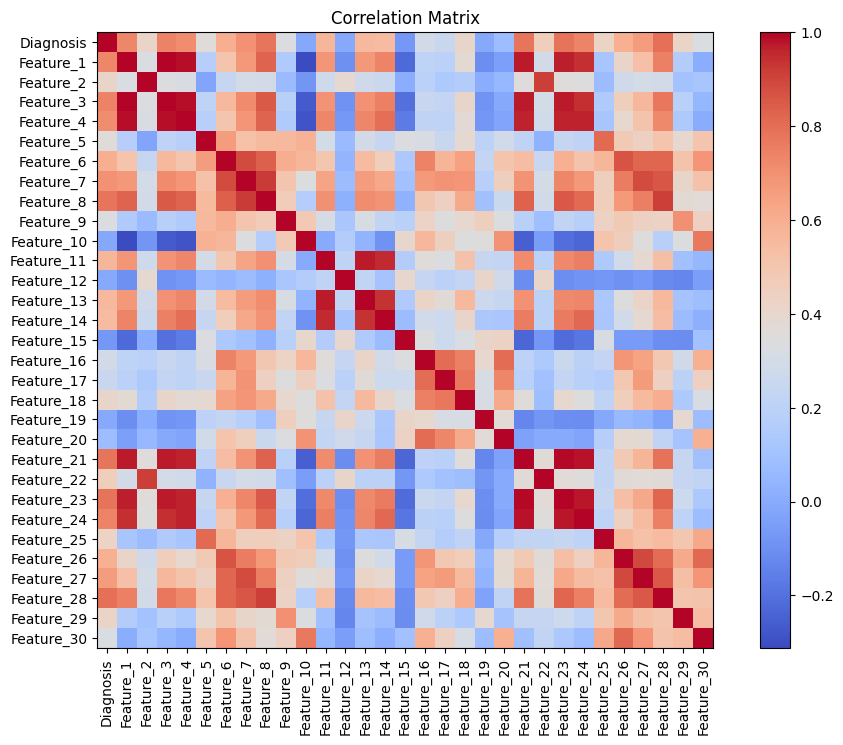

In [33]:
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Now calculate the correlation matrix
corr_matrix = data.drop(columns=['ID']).corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()


In [34]:
# Class Distribution
print("\nClass Distribution:")
print(data['Diagnosis'].value_counts())



Class Distribution:
Diagnosis
0    357
1    212
Name: count, dtype: int64


In [35]:
X = data.drop(columns=['ID', 'Diagnosis'])
y = data['Diagnosis']


In [36]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)


In [37]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Naive Bayes Classifier
nb_classifier = GaussianNB()


In [38]:
# Cross-validation
dt_cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=10)
nb_cv_scores = cross_val_score(nb_classifier, X_train, y_train, cv=10)
print("Decision Tree Cross-Validation Mean Accuracy:", dt_cv_scores.mean())
print("Naive Bayes Cross-Validation Mean Accuracy:", nb_cv_scores.mean())


Decision Tree Cross-Validation Mean Accuracy: 0.9372435897435898
Naive Bayes Cross-Validation Mean Accuracy: 0.9372435897435898


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
random_seed = 42

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=random_seed), param_grid=dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)
dt_best_params = dt_grid_search.best_params_
dt_best_model = dt_grid_search.best_estimator_

print("Best Parameters for Decision Tree:", dt_best_params)


Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}


In [40]:
priors_range = [(0.1, 0.9), (0.2, 0.8), (0.3, 0.7)]

nb_param_grid = {'priors': priors_range}

nb_grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=nb_param_grid, cv=5)

nb_grid_search.fit(X_train, y_train)
nb_best_params = nb_grid_search.best_params_
nb_best_model = nb_grid_search.best_estimator_

print("Best Parameters for Naive Bayes:", nb_best_params)

nb_y_pred = nb_best_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_y_pred)


Best Parameters for Naive Bayes: {'priors': (0.2, 0.8)}


In [41]:
dt_y_pred = dt_best_model.predict(X_test)
nb_y_pred = nb_best_model.predict(X_test)
print("\nDecision Tree Test Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Decision Tree Test Precision:", precision_score(y_test, dt_y_pred))
print("Decision Tree Test Recall:", recall_score(y_test, dt_y_pred))
print("\nNaive Bayes Test Accuracy:", accuracy_score(y_test, nb_y_pred))
print("Naive Bayes Test Precision:", precision_score(y_test, nb_y_pred))
print("Naive Bayes Test Recall:", recall_score(y_test, nb_y_pred))



Decision Tree Test Accuracy: 0.9590643274853801
Decision Tree Test Precision: 0.9666666666666667
Decision Tree Test Recall: 0.9206349206349206

Naive Bayes Test Accuracy: 0.9532163742690059
Naive Bayes Test Precision: 0.9661016949152542
Naive Bayes Test Recall: 0.9047619047619048


In [42]:
if accuracy_score(y_test, dt_y_pred) > accuracy_score(y_test, nb_y_pred):
    print("\nThe Decision Tree model performs better.")
else:
    print("\nThe Naive Bayes model performs better.")


The Decision Tree model performs better.
